## Torch example

In [5]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import os
import random
import matplotlib.pyplot as plt
from torchvision import transforms

print("Torch version:", torch.__version__)

Torch version: 2.3.1


### MNIST dataset

In [6]:
# ----------------
# FUNCTION TO SHOW EXAMPLE
# ----------------
def show_random_example(dataset):
    # Get a random index
    idx = random.randint(0, len(dataset) - 1)
    
    # Get the image and label
    img, label = dataset[idx]
    
    # Convert image to numpy array for plotting
    img = img.numpy().squeeze()
    
    # Plot the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_test = MNIST(os.getcwd(), train=False, download=True, transform=transform)

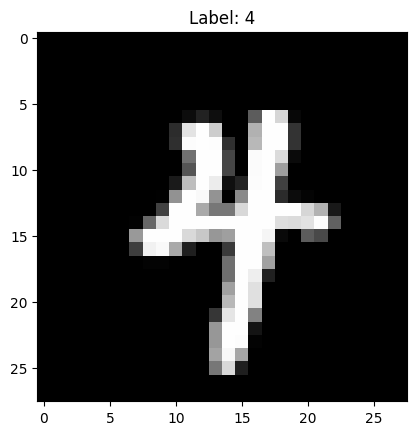

In [7]:
# Show a random example from the training dataset
show_random_example(mnist_test)

### Training and testing with torch

In [8]:
# -----------------
# MODEL
# -----------------
class MNISTClassifier(torch.nn.Module):
    """A simple feedforward neural network for MNIST classification.

    Attributes:
        layer_1 (torch.nn.Linear): First fully connected layer.
        layer_2 (torch.nn.Linear): Second fully connected layer.
        layer_3 (torch.nn.Linear): Third fully connected layer.
    """

    def __init__(self):
        """Initializes the neural network layers."""
        super(MNISTClassifier, self).__init__()

        # mnist images are (1, 28, 28) (channels, width, height)
        self.layer_1 = torch.nn.Linear(28 * 28, 128)
        self.layer_2 = torch.nn.Linear(128, 256)
        self.layer_3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        """Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor with log probabilities.
        """
        batch_size = x.size(0)

        # (b, 1, 28, 28) -> (b, 1*28*28)
        x = x.view(batch_size, -1)

        # layer 1
        x = self.layer_1(x)
        x = torch.relu(x)

        # layer 2
        x = self.layer_2(x)
        x = torch.relu(x)

        # layer 3
        x = self.layer_3(x)

        # probability distribution over labels
        x = torch.log_softmax(x, dim=1)

        return x


In [9]:
# ----------------
# DATA
# ----------------
# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the images
])

# Load the MNIST dataset for training and testing
mnist_train = MNIST(os.getcwd(), train=True, download=True, transform=transform)
mnist_test = MNIST(os.getcwd(), train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
mnist_train, mnist_val = random_split(mnist_train, [55000, 5000])

# Create data loaders for training, validation, and testing
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)


In [10]:
# ----------------
# MODEL INITIALIZATION AND TRAINING
# ----------------
# Initialize the model, optimizer, and loss function
pytorch_model = MNISTClassifier()
optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=1e-3)
criterion = torch.nn.NLLLoss()

num_epochs = 5  # Number of training epochs

for epoch in range(num_epochs):
    # TRAINING LOOP
    pytorch_model.train()  # Set the model to training mode
    train_loss_total = 0  # Initialize the total training loss

    for step, train_batch in enumerate(train_loader):
        x, y = train_batch  # Get the input data and labels from the batch

        optimizer.zero_grad()  # Clear the gradients
        logits = pytorch_model(x)  # Forward pass
        loss = criterion(logits, y)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the model parameters

        train_loss_total += loss.item()  # Accumulate the training loss

        # Print training progress
        if (step + 1) % 100 == 0 or (step + 1) == len(train_loader):
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{step+1}/{len(train_loader)}], Train Loss: {loss.item():.4f}')

    # VALIDATION LOOP
    pytorch_model.eval()  # Set the model to evaluation mode
    val_loss_total = 0  # Initialize the total validation loss

    with torch.no_grad():  # Disable gradient computation
        for val_batch in val_loader:
            x, y = val_batch  # Get the input data and labels from the batch
            logits = pytorch_model(x)  # Forward pass
            val_loss_total += criterion(logits, y).item()  # Accumulate the validation loss

        val_loss_avg = val_loss_total / len(val_loader)  # Compute the average validation loss

    train_loss_avg = train_loss_total / len(train_loader)  # Compute the average training loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_avg:.4f}, Validation Loss: {val_loss_avg:.4f}')

Epoch [1/5], Step [100/860], Train Loss: 0.2060
Epoch [1/5], Step [200/860], Train Loss: 0.1424
Epoch [1/5], Step [300/860], Train Loss: 0.2088
Epoch [1/5], Step [400/860], Train Loss: 0.2177
Epoch [1/5], Step [500/860], Train Loss: 0.2761
Epoch [1/5], Step [600/860], Train Loss: 0.0611
Epoch [1/5], Step [700/860], Train Loss: 0.0536
Epoch [1/5], Step [800/860], Train Loss: 0.1706
Epoch [1/5], Step [860/860], Train Loss: 0.0913
Epoch [1/5], Train Loss: 0.2524, Validation Loss: 0.1259
Epoch [2/5], Step [100/860], Train Loss: 0.1431
Epoch [2/5], Step [200/860], Train Loss: 0.1259
Epoch [2/5], Step [300/860], Train Loss: 0.0819
Epoch [2/5], Step [400/860], Train Loss: 0.1094
Epoch [2/5], Step [500/860], Train Loss: 0.1015
Epoch [2/5], Step [600/860], Train Loss: 0.1475
Epoch [2/5], Step [700/860], Train Loss: 0.0574
Epoch [2/5], Step [800/860], Train Loss: 0.1977
Epoch [2/5], Step [860/860], Train Loss: 0.2124
Epoch [2/5], Train Loss: 0.1070, Validation Loss: 0.0982
Epoch [3/5], Step [100

In [11]:
# ----------------
# FUNCTION TO DO PREDICTION
# ----------------
def show_random_example(model, dataset):
    """
    Show a random example from the dataset along with its predicted and actual labels.

    Args:
        model (torch.nn.Module): Trained model.
        dataset (torch.utils.data.Dataset): Dataset to sample from.
    """
    # Set the model to evaluation mode
    model.eval()
    
    # Get a random index
    idx = random.randint(0, len(dataset) - 1)
    
    # Get the image and label
    img, label = dataset[idx]
    
    # Add batch dimension and perform inference
    with torch.no_grad():
        logits = model(img.unsqueeze(0))  # Add batch dimension
        prediction = torch.argmax(logits, dim=1).item()  # Get predicted label
    
    # Convert image to numpy array for plotting
    img = img.numpy().squeeze()
    
    # Plot the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Actual Label: {label}, Predicted Label: {prediction}')
    plt.show()

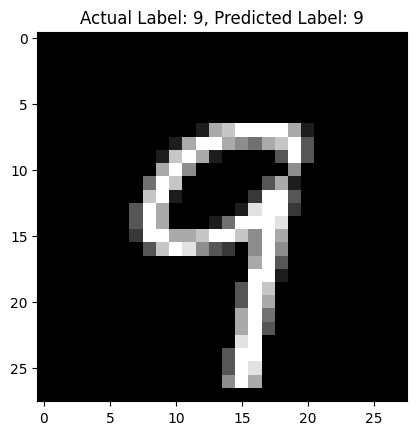

In [24]:
# ----------------
# INFERENCE
# ----------------
# Show a random example from the test set along with its predicted and actual labels
show_random_example(pytorch_model, mnist_test)